## import & load

In [1]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

import datetime
import pytz
import importlib
import matplotlib.pyplot as plt


import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [2]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [3]:
import data.read
importlib.reload(data.read)

<module 'data.read' from '/home/junlim/projects/jitter_recovery/data/read.py'>

In [4]:
df = data.read.df_binance_20240125_0202
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [5]:
df.tail(3)

,timestamp,symbol,open,high,low,close,volume
4296584,2024-02-02 04:58:00,CREAMUSDT,15.34000,15.36000,15.34000,15.35000,3.533
4296585,2024-02-02 04:58:00,MINAUSDT,1.24880,1.24950,1.24830,1.24870,2385.200
4296586,2024-02-02 04:58:00,FIOUSDT,0.02541,0.02541,0.02541,0.02541,5270.000


In [6]:
len([s for s in all_symbols if 'USDT' in s])

373

## multiple symbols

In [7]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [8]:
jitter_recovery_feature_param = algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(240)
jitter_recovery_feature_param_ = algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(48)
max_jump_threshold = 0.4
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    jitter_recovery_feature_param, 
    0.4, -0.10, 0.05, is_long_term=True)

In [9]:
dfst_feature, dfst_trading = algo.jitter_recovery.research.get_dfsts(df, jitter_recovery_trading_param)

0 symbol: OGUSDT: 0
1 symbol: QKCUSDT: 0
2 symbol: GNSUSDT: 0
3 symbol: FTMUSDT: 0
4 symbol: FLUXUSDT: 0
5 symbol: XTZUSDT: 0
6 symbol: GMXUSDT: 0
7 symbol: FETUSDT: 0
8 symbol: CELOUSDT: 0
9 symbol: MASKUSDT: 0
10 symbol: EOSUSDT: 0
11 symbol: PERPUSDT: 0
12 symbol: LINKUSDT: 0
13 symbol: PUNDIXUSDT: 0
14 symbol: ETCUSDT: 0
15 symbol: SOLUSDT: 0
16 symbol: ASRUSDT: 0
17 symbol: ETHUPUSDT: 0
18 symbol: FTTUSDT: 13
19 symbol: OMUSDT: 0
20 symbol: SFPUSDT: 0
21 symbol: LTCUSDT: 0
22 symbol: BELUSDT: 0
23 symbol: DODOUSDT: 0
24 symbol: LTOUSDT: 0
25 symbol: CYBERUSDT: 0
26 symbol: VICUSDT: 0
27 symbol: RIFUSDT: 0
28 symbol: COSUSDT: 18
29 symbol: CTSIUSDT: 0
30 symbol: BTTCUSDT: 0
31 symbol: RENUSDT: 0
32 symbol: PLAUSDT: 0
33 symbol: LAZIOUSDT: 0
34 symbol: MATICUSDT: 0
35 symbol: ALICEUSDT: 0
36 symbol: BATUSDT: 0
37 symbol: KSMUSDT: 0
38 symbol: FORTHUSDT: 0
39 symbol: EURUSDT: 0
40 symbol: XRPUSDT: 0
41 symbol: HIVEUSDT: 0
42 symbol: MLNUSDT: 0
43 symbol: FRONTUSDT: 0
44 symbol: ORNUS

<Axes: xlabel='timestamp'>

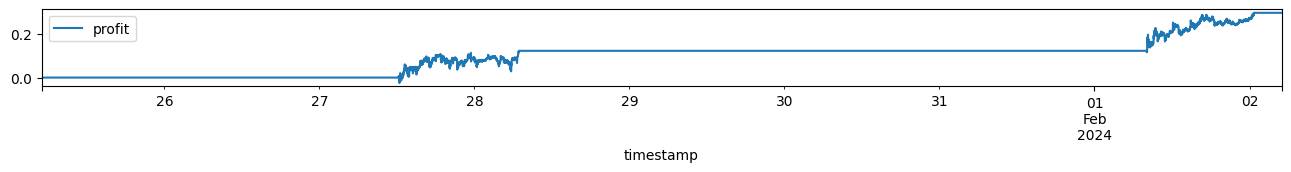

In [10]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(16,1))

In [11]:
dfst_trading[dfst_trading.profit != 0].dropna()[['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
DCRUSDT,0.121887
FTTUSDT,0.173157


In [12]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-27 12:16:00, DCRUSDT, 20.175, position_changed: 1.0
2024-01-28 06:52:00, DCRUSDT, 17.62, position_changed: -1.0
2024-02-01 08:05:00, FTTUSDT, 2.2368, position_changed: 1.0
2024-02-02 00:40:00, FTTUSDT, 1.8591, position_changed: -1.0


## single symobl

In [16]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [17]:
symbol_investigate = 'FTTUSDT'
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(240), 
    0.40, -0.10, 0.05, is_long_term=True)

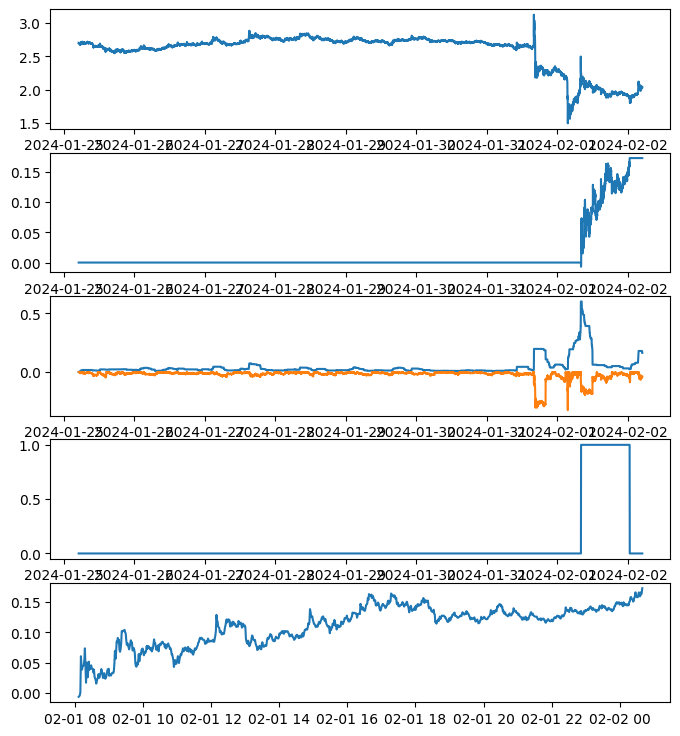

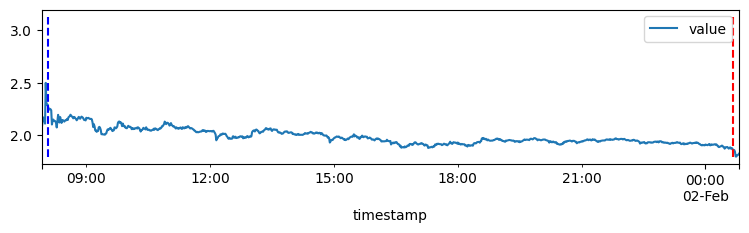

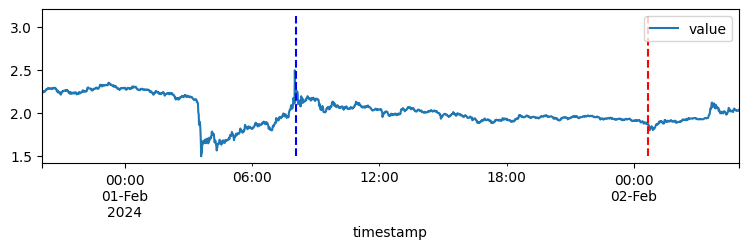

In [18]:
df_feature, df_trading = algo.jitter_recovery.research.investigate_symbol(df, symbol_investigate, jitter_recovery_trading_param, figsize=(8,9))

In [154]:
i_head = df_trading.index.get_loc(df_trading[df_trading.position_changed == +1].index[0])
i_tail = df_trading.index.get_loc(df_trading[df_trading.position_changed == -1].index[-1])

In [155]:
df_trading.iloc[i_head-2:i_head+2]

,value,ch_max,ch_min,avg_v_before_max_ch,avg_v_before_min_ch,v_ch_max_is_from,v_ch_min_is_from,v_ch_max_is_to,v_ch_min_is_to,ch_since_max,...,lowest_since_enter,timedelta_since_position_enter,v_ch_max_is_to_when_enter,v_ch_min_is_to_when_enter,v_ch_max_is_from_when_enter,v_ch_min_is_from_when_enter,ch_from_enter,ch_from_lowest_since_enter,profit_raw,profit
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-01 08:03:00,2.2849,0.601321,-0.123834,1.826807,1.698629,1.5594,1.7798,2.4971,1.5594,-0.084979,...,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000
2024-02-01 08:04:00,2.2899,0.601321,-0.123834,1.827330,1.698362,1.5594,1.7798,2.4971,1.5594,-0.082976,...,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,-0.0000,-0.000000
2024-02-01 08:05:00,2.2368,0.601321,-0.123834,1.827744,1.696287,1.5594,1.7798,2.4971,1.5594,-0.104241,...,2.2368,0,2.4971,1.5594,1.5594,1.7798,0.000000,0.000000,0.0000,0.000000
2024-02-01 08:06:00,2.2522,0.601321,-0.123834,1.827976,1.690779,1.5594,1.7798,2.4971,1.5594,-0.098074,...,2.2368,1,2.4971,1.5594,1.5594,1.7798,0.006885,0.006885,-0.0154,-0.006885


In [156]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-02-01 08:05:00,2.2368,1,1.0,0.0000,0.000000
2024-02-02 00:40:00,1.8591,0,-1.0,0.0147,0.007845
